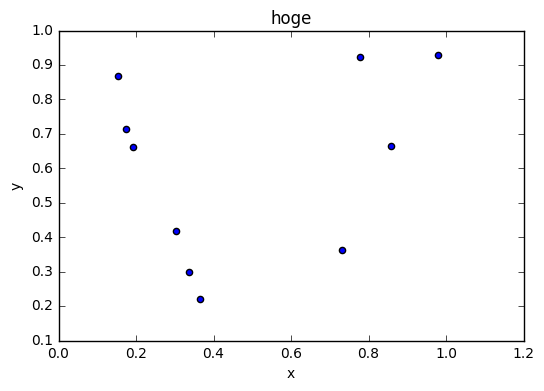

In [64]:
# ライブラリの読み込み
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = np.random.rand(10)
y = np.random.rand(10)

plt.scatter(x, y)

plt.title("hoge")
plt.xlabel("x")
plt.ylabel("y")

In [65]:
redwine = pd.read_csv("../data/wine-quality/winequality-red.csv", delimiter=";")

- pandasはcell内に改行があると見するので注意

In [67]:
redwine.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

## 集計でデータの理解をする

- 平均

In [68]:
redwine.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

- 標本分散と標本標準偏差

In [22]:
redwine.std()  # 標準偏差

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

- 記述統計をまとめて出力

In [23]:
redwine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

- 基本的には統計値の平均とメジアンを見ておけば良い

### quality毎に変数の平均を求める

In [24]:
redwine.groupby("quality").mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

- qualityが10段階なのに最小値が3になってる！このデータは正しいが、ただただ足りないだけの場合もあるので注意する
- 実際は表に出すよりもグラフで出すことの方が多い
- データセットがただしいかや、いい感じにデータがなっていそうかの雰囲気確認のために出力して確認する

## グラフでデータの理解をする

#### ワインの質のヒストグラム

- データの分布を読み取る

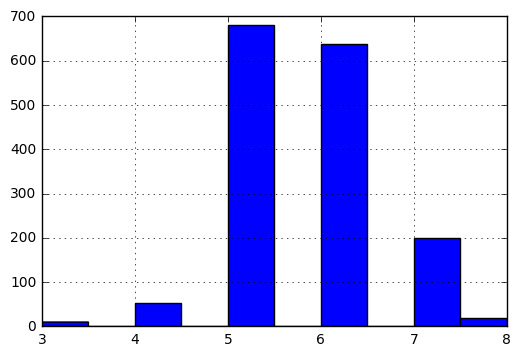

In [25]:
redwine["quality"].hist()

#### ワインの質の円グラフ

- ヒストグラムの方が読みやすいと感じるが、円グラフで分布が表示されることも在る

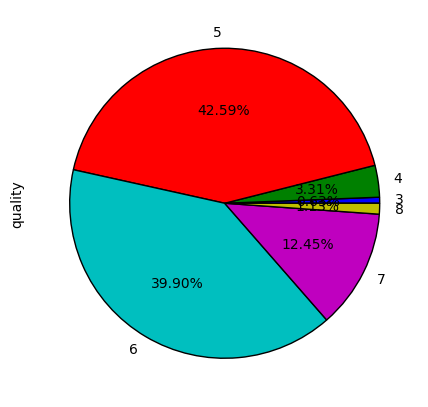

In [26]:
redwine.groupby(by="quality").size().plot(kind="pie", figsize=(5, 5), autopct='%.2f%%', label="quality", sort_columns=True)

### 散布図

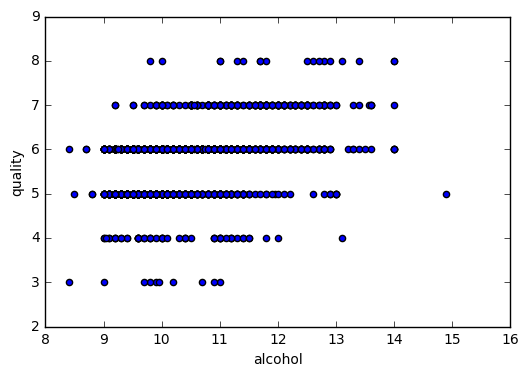

In [27]:
redwine.plot(kind='scatter', x="alcohol", y="quality")

### 箱ひげ図

データ量が増えると散布図が崩れてしまうので、箱ひげ図を使うことのほうが多かったりする。

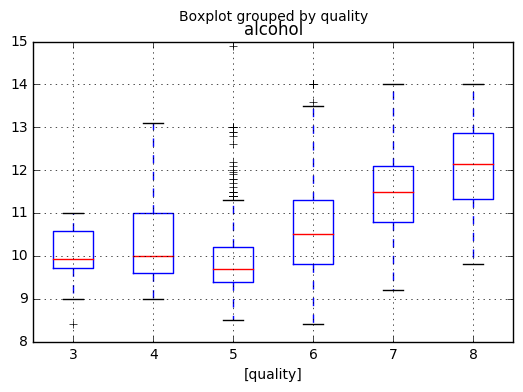

In [28]:
redwine[["alcohol", "quality"]].boxplot(column=["alcohol"], by=["quality"])

- ひげの位置が飛び抜けていたりすると、データおかしいのかなとか疑える。
    - 例えば、quality:3の上のひげが15とかに来てたらおかしそうとか

### 散布図行列

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118be2c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c2a0630>]], dtype=object)

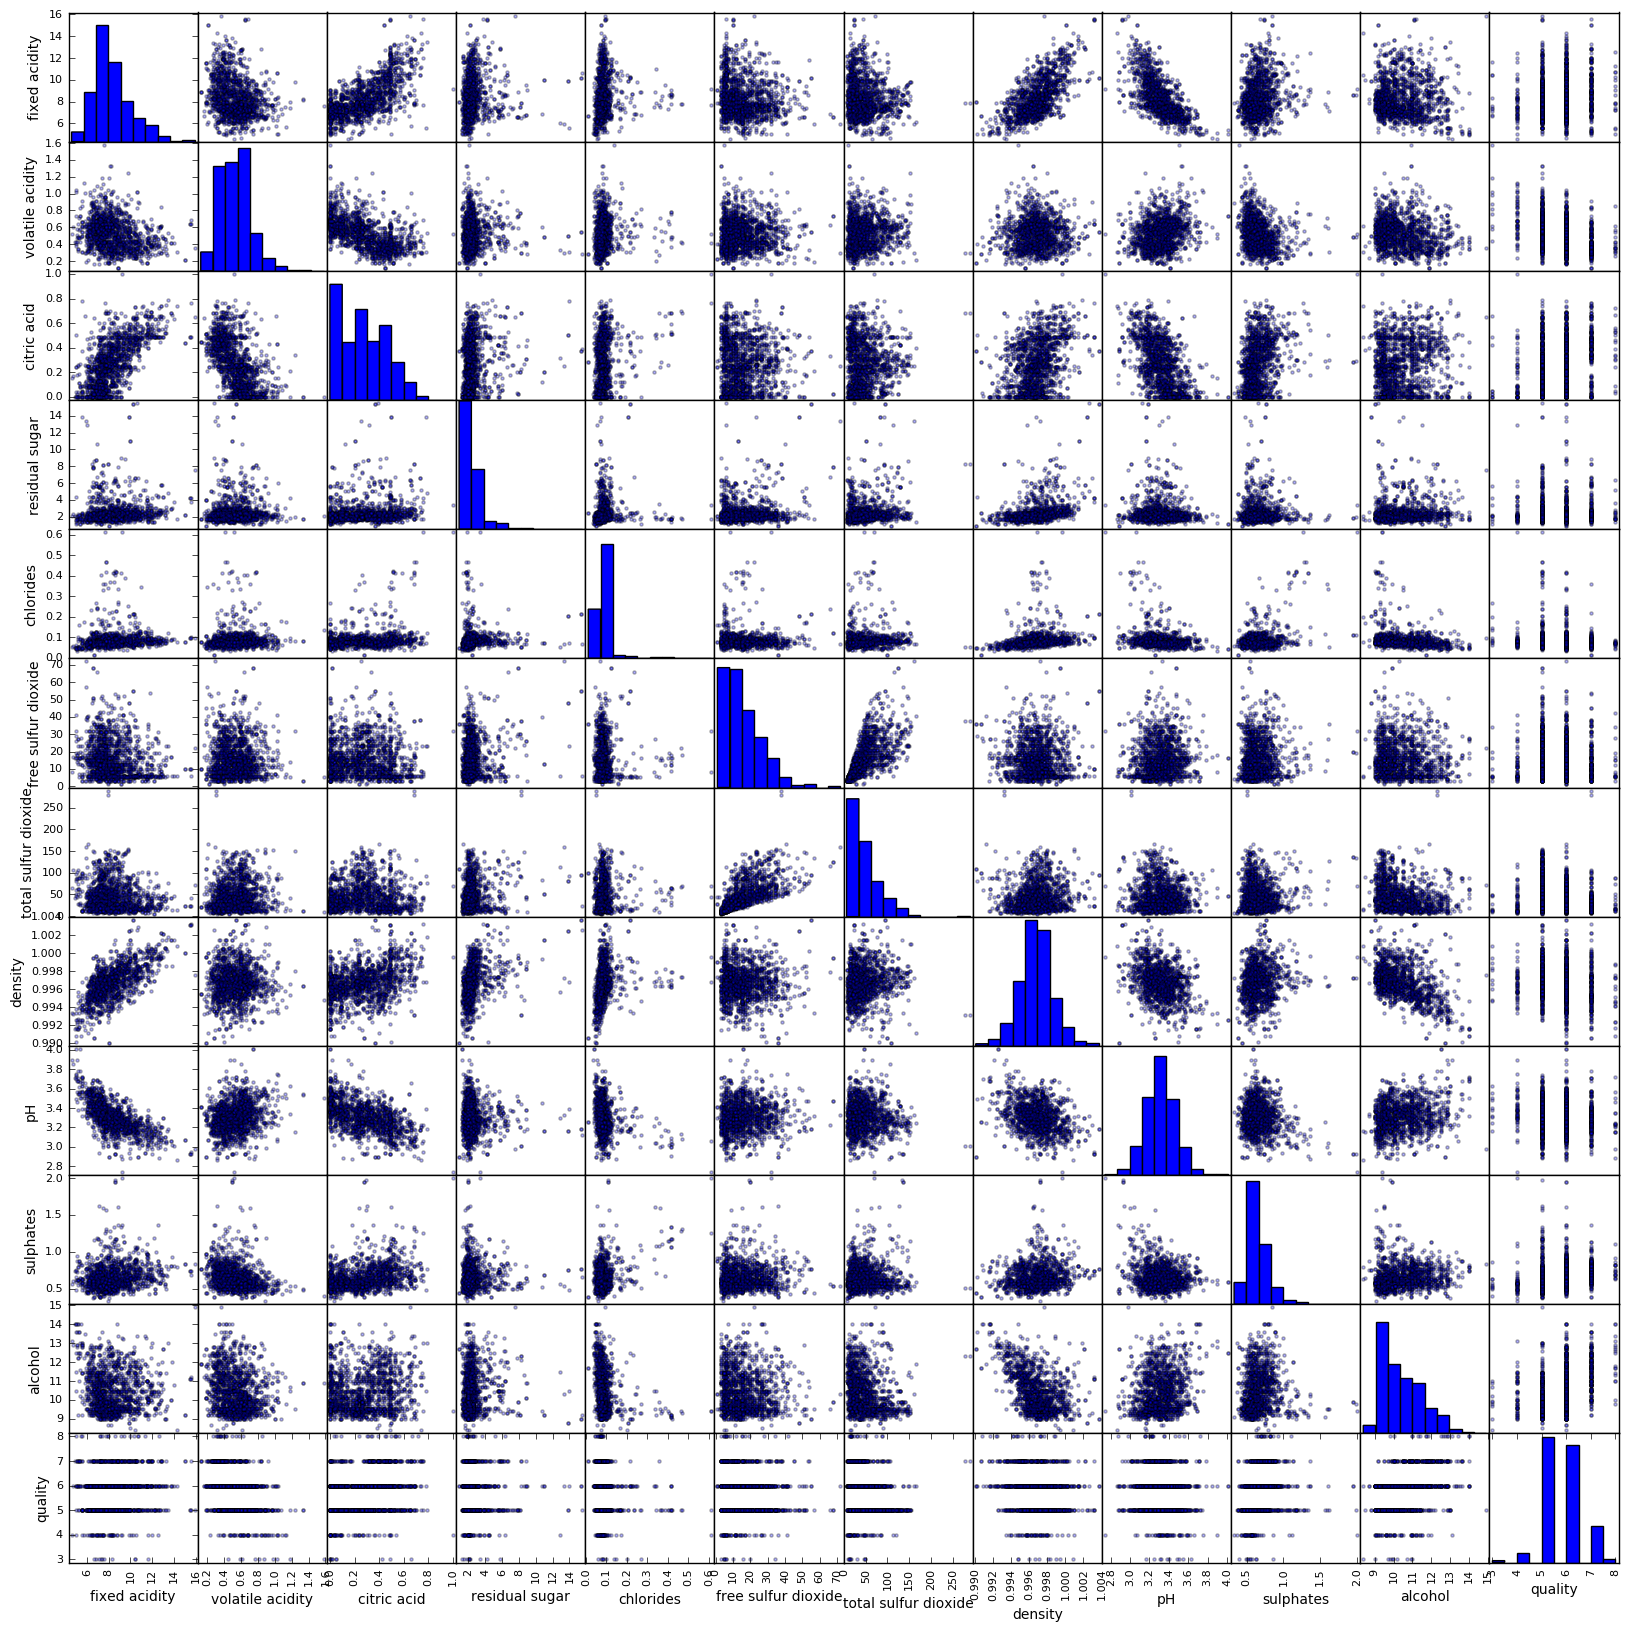

In [30]:
pd.scatter_matrix(redwine, alpha=0.3, figsize=(20, 20))

- これも見にくい場合は、箱ひげ図を並べる

## 解釈しやすいモデリング

qualityを5以下or5より大きいで分けてしまう

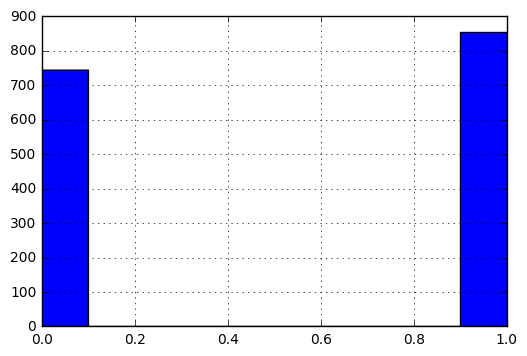

In [70]:
redwine["quality_low_high"] = redwine["quality"] > 5
x_columns = ['fixed acidity', 'volatile acidity']
redwine.quality_low_high.hist()

今回は、2値分類したときに真ん中でわけていい感じになったが、そうならない場合はちょっとテクニックが必要
- データのサンプリングを変える（アンダーサンプリングとオーバーサンプリング）
- 0に近いサンプルが2〜3個と少なかった場合は、1のグループの中心から離れているものを0とみなすとかいう異常検知的な手法を用いる

### 決定木でモデリング

In [74]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(redwine[x_columns], redwine["quality_low_high"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

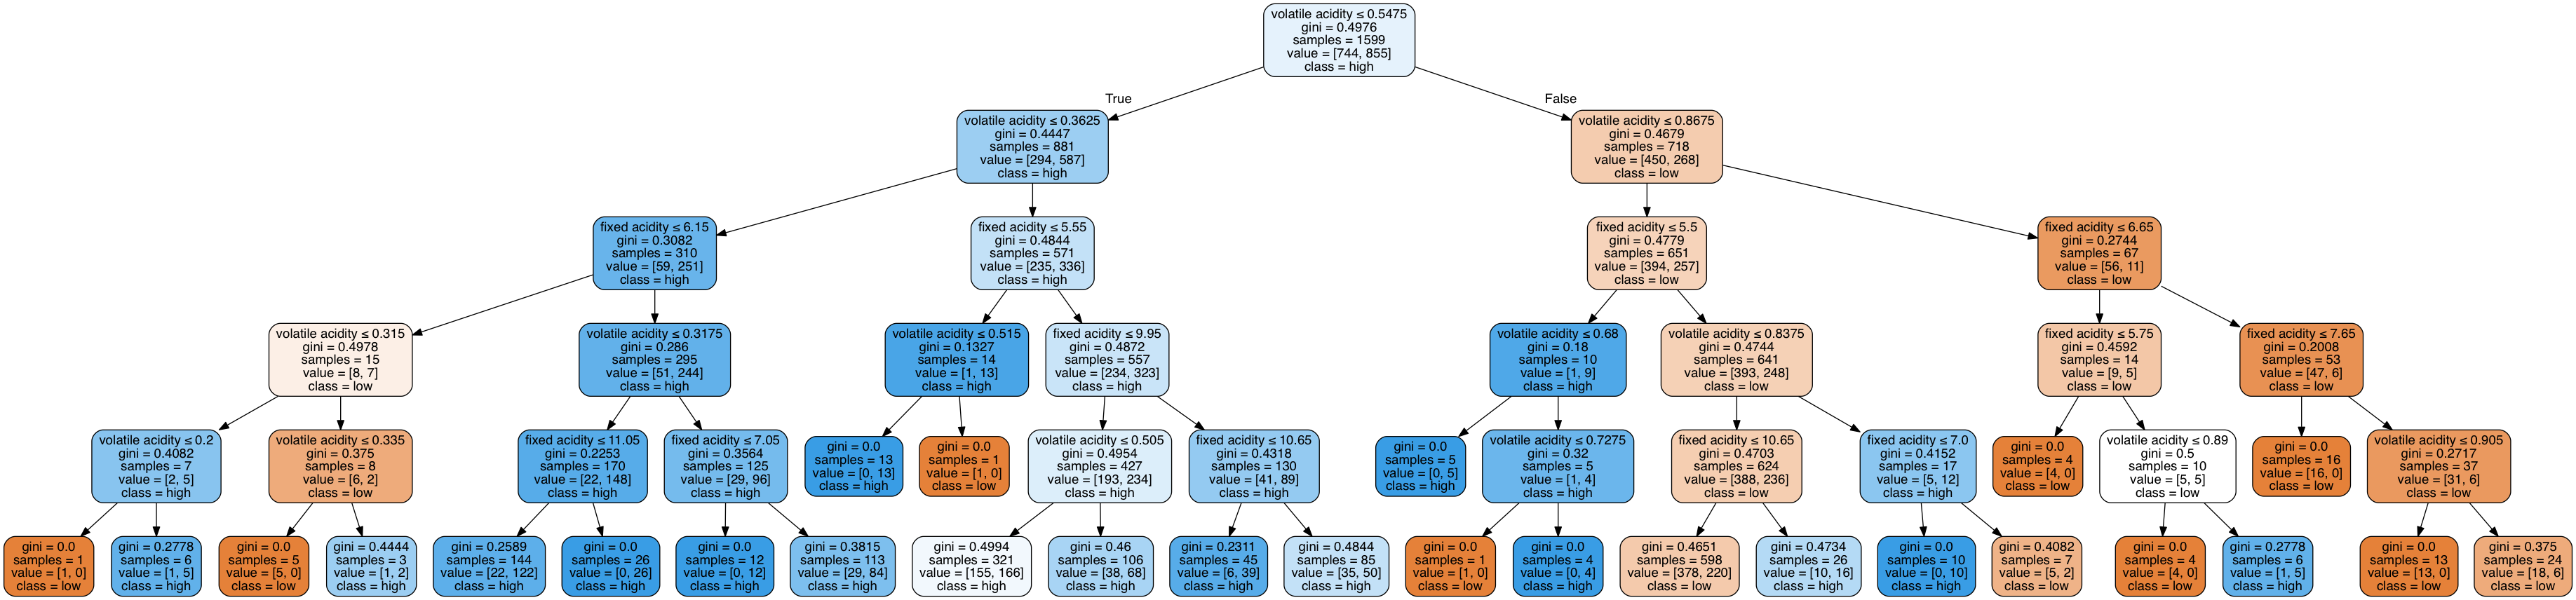

In [75]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

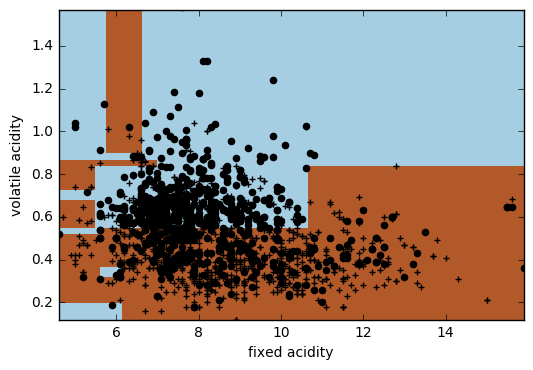

In [76]:
X = redwine[x_columns]
xMin = redwine[x_columns[0]].min()
xMax = redwine[x_columns[0]].max()
yMin = redwine[x_columns[1]].min()
yMax = redwine[x_columns[1]].max()
target = redwine["quality_low_high"]
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X, target)
xx,yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(x_columns[0])
plt.ylabel(x_columns[1])
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(redwine[x_columns[0]].ix[target.values==False], redwine[x_columns[1]].ix[target.values==False], marker="o", c="black")
plt.scatter(redwine[x_columns[0]].ix[target.values==True], redwine[x_columns[1]].ix[target.values==True], marker="+", c="black")

#### クロスバリデーションでパラメータを決定する（2変数のみで）

2 0.63727468652
3 0.619106583072
4 0.61224137931
5 0.606596786834
6 0.604114420063
7 0.612253134796
8 0.598475705329
9 0.597842868339


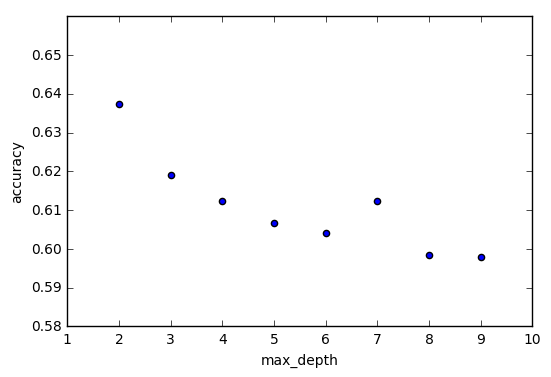

In [77]:
from sklearn.cross_validation import cross_val_score
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

#### 全変数でクロスバリデーションしてみる

2 0.677292319749
3 0.687323667712
4 0.687948667712
5 0.707306034483
6 0.691038401254
7 0.69355015674
8 0.678536442006
9 0.667260971787


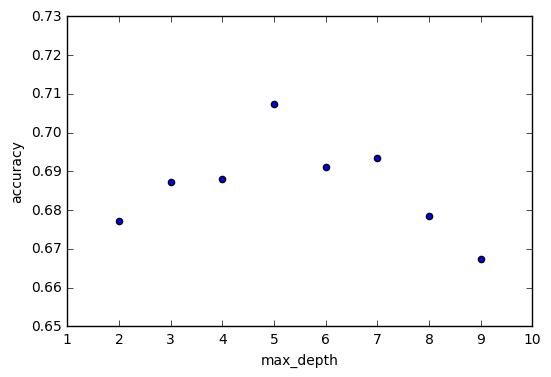

In [78]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

[ ] 思いつく限りの変数を入れてどの変数を使うかを決定するという話があったが、変数はどうやったら思いつけるんですか？センスですか？

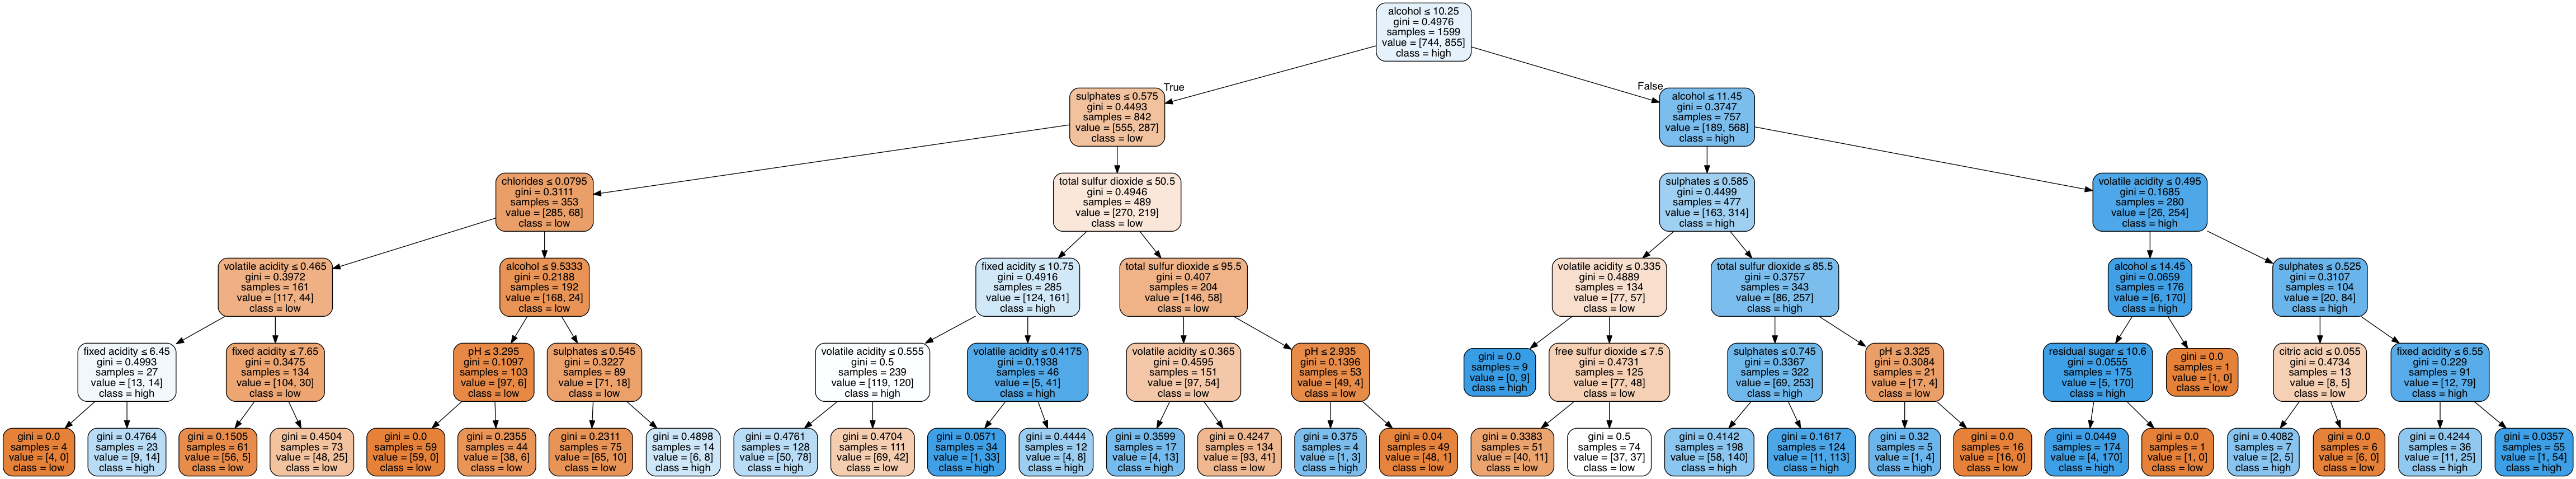

In [79]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(redwine[x_columns], redwine["quality_low_high"])
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

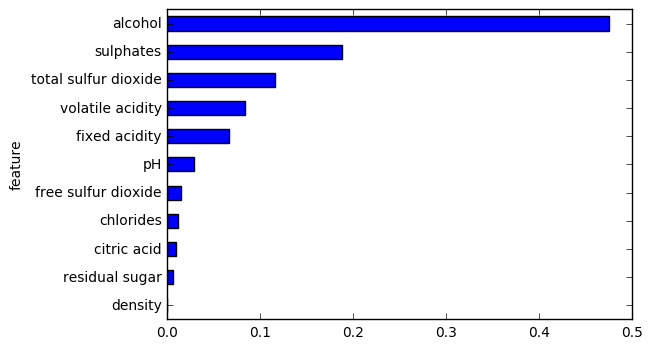

In [80]:
feature_importance = pd.DataFrame([i for i in zip(x_columns, clf.feature_importances_)])
feature_importance.columns = ["feature", "importance"]
feature_importance.sort_values("importance", ascending=True).plot(kind="barh", x="feature", y="importance",legend=False)

- 深さ5で決定木を作って、その生成に影響を与えた重要度の高い変数を出す
- 上位2変数で再度モデリングしてみると...

2 0.675417319749
3 0.729827586207
4 0.714829545455
5 0.71668299373
6 0.68480799373
7 0.684173197492
8 0.673536442006
9 0.663530564263


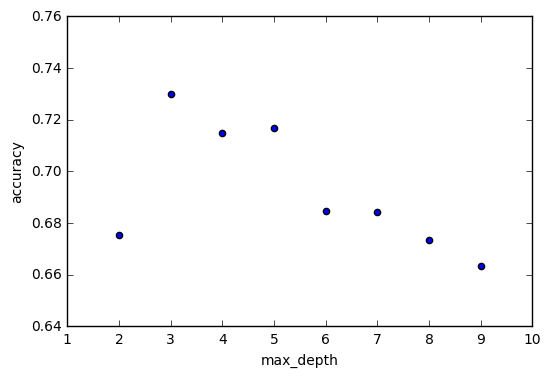

In [81]:
x_columns = ['sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy")
    print(i, scores.mean())
    tree_param.append((i, scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "accuracy"]
cv_df.plot(kind="scatter", x="max_depth", y="accuracy")

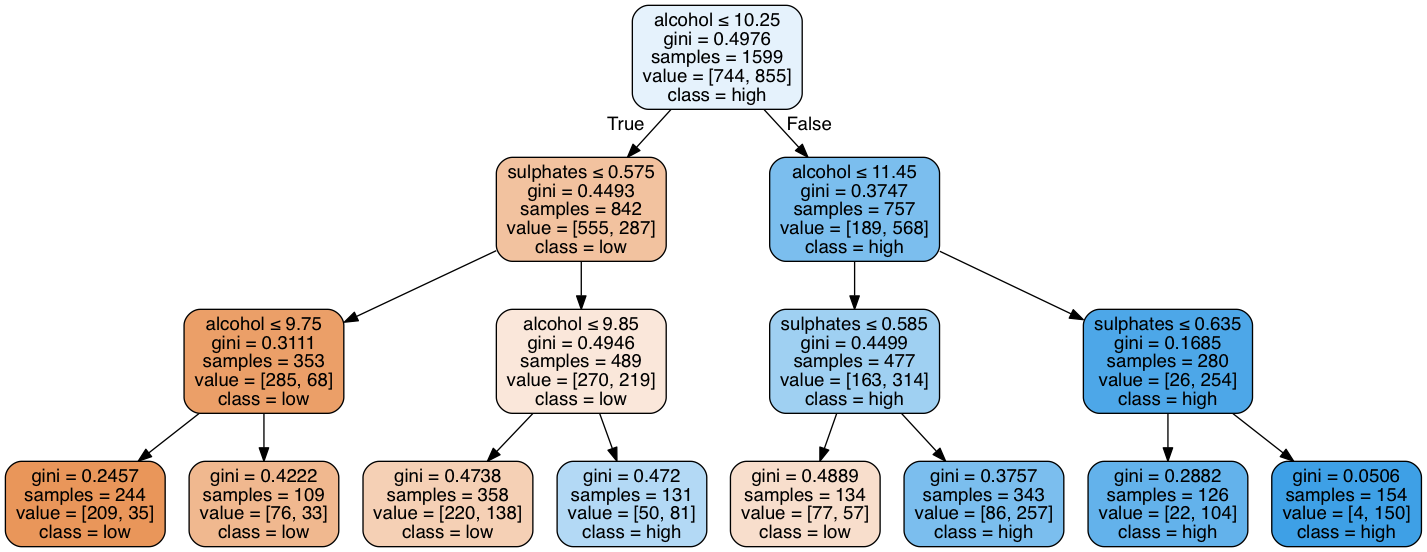

In [82]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(redwine[x_columns], redwine["quality_low_high"])
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=x_columns,
                     class_names=["low", "high"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### ロジスティック回帰でモデリング

- 縦でバチッと切る場合は決定木だが、曲線で切る場合はロジスティック回帰を利用する

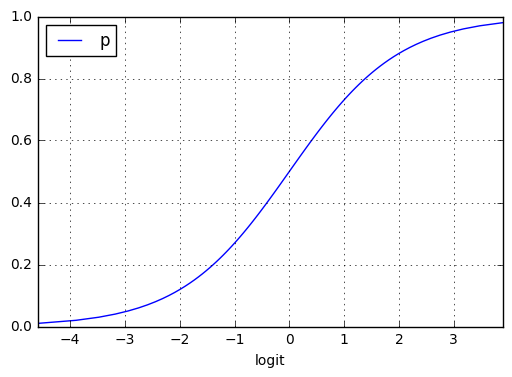

In [83]:
p = np.arange(0.01, 0.99, 0.01)
logit = np.log(p/(1-p))
pd.DataFrame.from_dict({"logit":logit, "p":p}).plot(kind="line", x="logit", y="p", grid=True)

#### 先程決定木で重要だった2変数でやってみる

In [84]:
from sklearn.linear_model import LogisticRegression
x_columns = ['sulphates', 'alcohol']
LogReg = LogisticRegression()
LogReg.fit(redwine[x_columns], redwine["quality_low_high"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

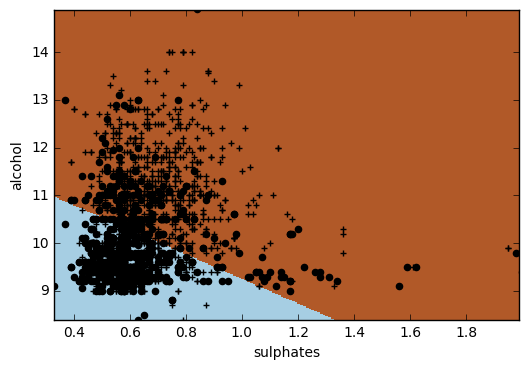

In [85]:
X = redwine[x_columns]
xMin = redwine[x_columns[0]].min()
xMax = redwine[x_columns[0]].max()
yMin = redwine[x_columns[1]].min()
yMax = redwine[x_columns[1]].max()
target = redwine["quality_low_high"]
LogReg = LogisticRegression()
LogReg.fit(X, target)
xx,yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))
Z = LogReg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(x_columns[0])
plt.ylabel(x_columns[1])
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(redwine[x_columns[0]].ix[target.values==False], redwine[x_columns[1]].ix[target.values==False], marker="o", c="black")
plt.scatter(redwine[x_columns[0]].ix[target.values==True], redwine[x_columns[1]].ix[target.values==True], marker="+", c="black")

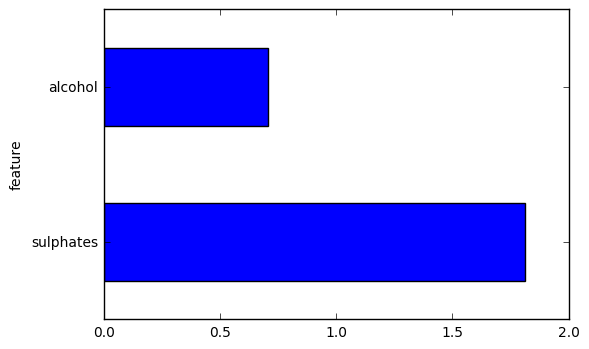

In [86]:
feature_coef = pd.DataFrame([i for i in zip(x_columns, LogReg.coef_[0])])
feature_coef.columns = ["feature", "coef"]
feature_coef.plot(kind="barh", x="feature", y="coef",legend=False)

In [87]:
cross_val_score(LogReg, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy").mean()

0.70420454545454558

#### 全変数利用する

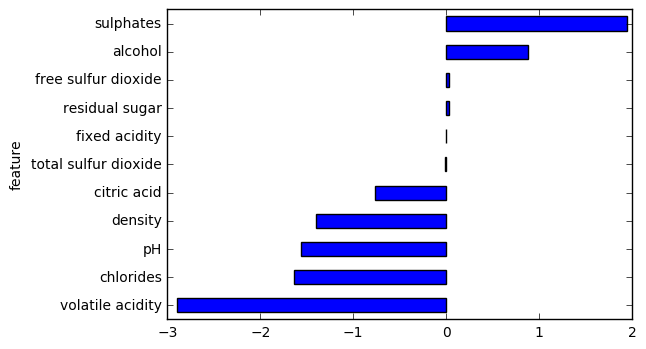

In [88]:
from sklearn.linear_model import LogisticRegression
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
LogReg = LogisticRegression()
LogReg.fit(redwine[x_columns], redwine["quality_low_high"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, LogReg.coef_[0])])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)

- これでワインに好影響を与えている変数を悪影響を与えている変数が分かる

In [89]:
cross_val_score(LogReg, redwine[x_columns], redwine["quality_low_high"], cv=5, scoring="accuracy").mean()

0.73233934169278991

[ ] 決定木とロジスティク回帰の他に良くつかうモデルは？

## ワインの質を回帰分析する

それぞれのデータがワインの質3〜8に当てはまっているかを調べる（2値分類ではなくということ）

### 回帰木を作る

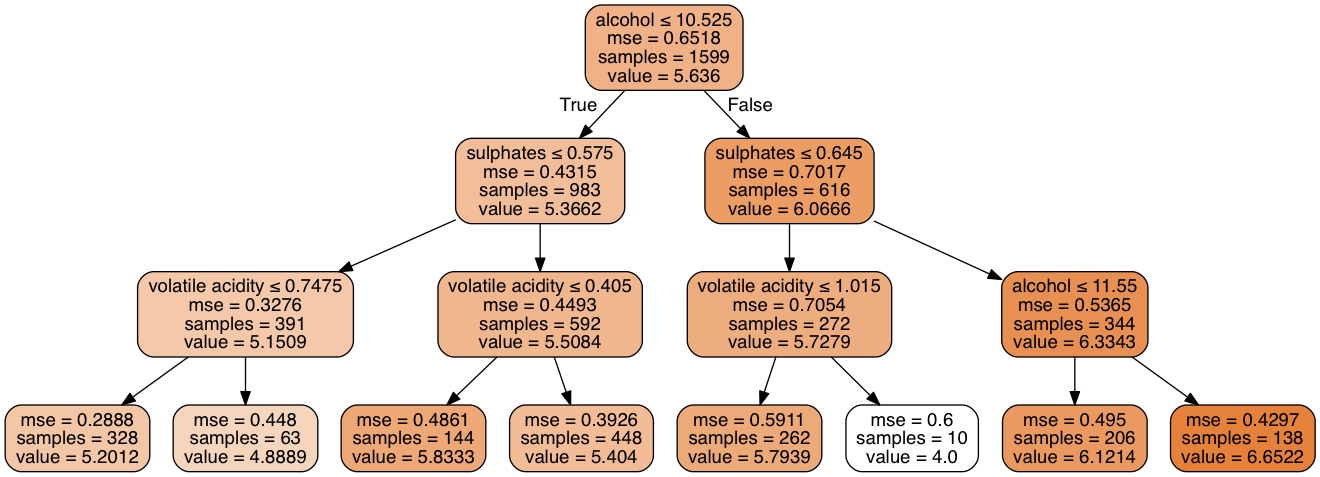

In [90]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
reg = tree.DecisionTreeRegressor(max_depth=3)
reg.fit(redwine[x_columns], redwine["quality"])
dot_data = StringIO()
tree.export_graphviz(reg, out_file=dot_data,
                     feature_names=x_columns,  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

2 0.526371712531
3 0.484200318584
4 0.484655383773
5 0.496017869954
6 0.517462576223
7 0.557750688121
8 0.606107797189
9 0.670559355002


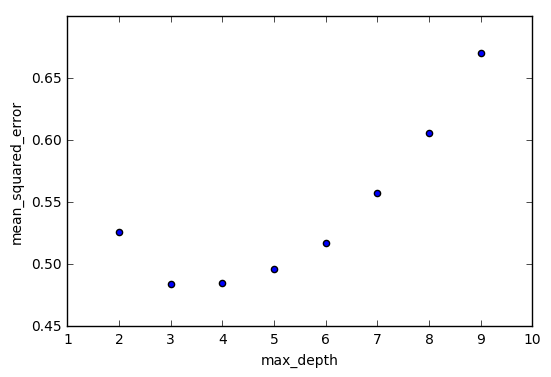

In [91]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in range(2, 10):
    reg = tree.DecisionTreeRegressor(max_depth=i)
    scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
    print(i, -1 * scores.mean())
    tree_param.append((i, -1 * scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["max_depth", "mean_squared_error"]
cv_df.plot(kind="scatter", x="max_depth", y="mean_squared_error")


- クロスバリデーションの結果、max_depth(木の深さ)が3の時に最も精度が良い (誤差が一番低い)

#### 変数の重要度を出してみる

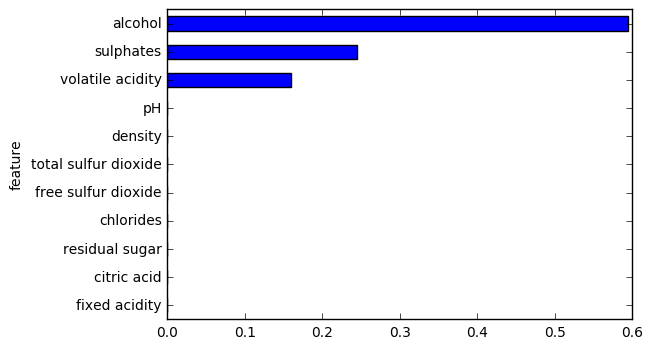

In [92]:
reg = tree.DecisionTreeRegressor(max_depth=3)
reg.fit(redwine[x_columns], redwine["quality"])
feature_importance = pd.DataFrame([i for i in zip(x_columns, reg.feature_importances_)])
feature_importance.columns = ["feature", "importance"]
feature_importance.sort_values("importance", ascending=True).plot(kind="barh", x="feature", y="importance",legend=False)

#### 誤差の絶対値

真値と予測値の誤差の絶対値の出現頻度をグラフにしてみる。多くの例で1以内に誤差が収まっている。

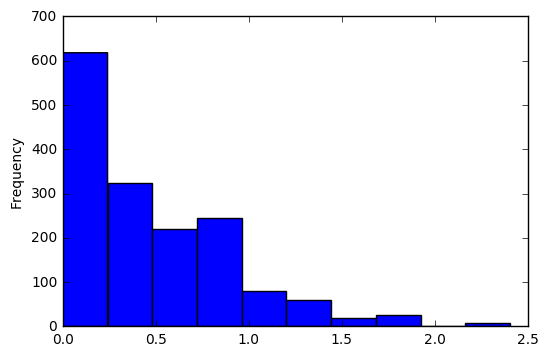

In [93]:
predict = pd.DataFrame.from_dict({"quality":redwine["quality"],
                                  "predict":reg.predict(redwine[x_columns])})
predict["error"] = abs(predict["quality"] - predict["predict"])
predict["error"].plot(kind="hist")

#### 重回帰分析

平面を曲線出来るのがロジスティク回帰で、多変数次元を切るのが重回帰

0.436629388032


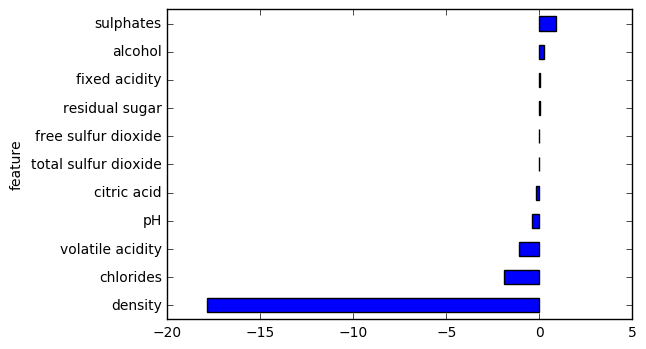

In [94]:
from sklearn import linear_model
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
reg = linear_model.LinearRegression()
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.coef_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)
scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
print(-1 * scores.mean())

0.43なので回帰木よりもいい感じの精度が出ているが、densityが突き抜けているのが気になりますね...。
下図で、誤差もいい感じ。

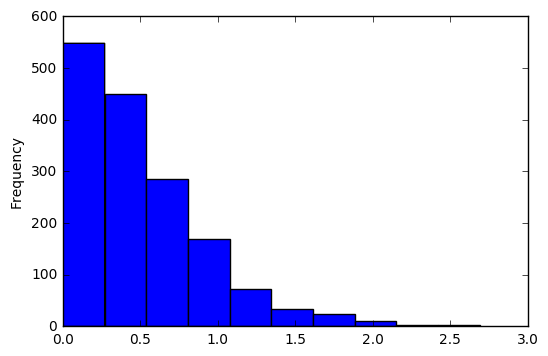

In [52]:
predict = pd.DataFrame.from_dict({"quality":redwine["quality"],
                                  "predict":reg.predict(redwine[x_columns])})
predict["error"] = abs(predict["quality"] - predict["predict"])
predict["error"].plot(kind="hist")

#### リッジ回帰

重回帰が左下に決定木が右上になりやすいが、リッジ回帰はそれをいい感じにしてくれる。

0.0 0.436629388032
0.1 0.43587918619
0.2 0.435922799792
0.3 0.435982009764
0.4 0.436050628718
0.5 0.436124627199
0.6 0.436201269123
0.7 0.4362786852
0.8 0.436355603634
0.9 0.436431170186


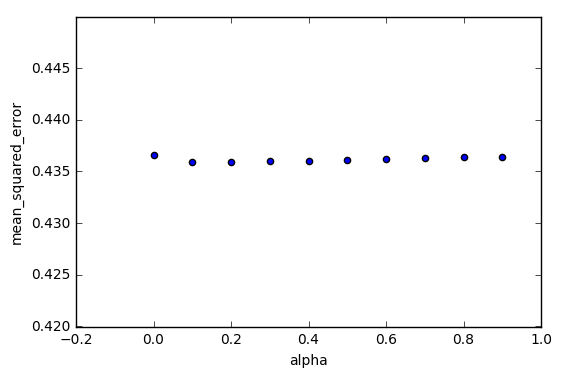

In [53]:
x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
tree_param = []
for i in np.arange(0, 1, 0.1):
    reg = linear_model.Ridge(alpha = i)
    scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
    print(i, -1 * scores.mean())
    tree_param.append((i, -1 * scores.mean()))
cv_df = pd.DataFrame(tree_param)
cv_df.columns = ["alpha", "mean_squared_error"]
cv_df.plot(kind="scatter", x="alpha", y="mean_squared_error")

0.9 0.43587918619


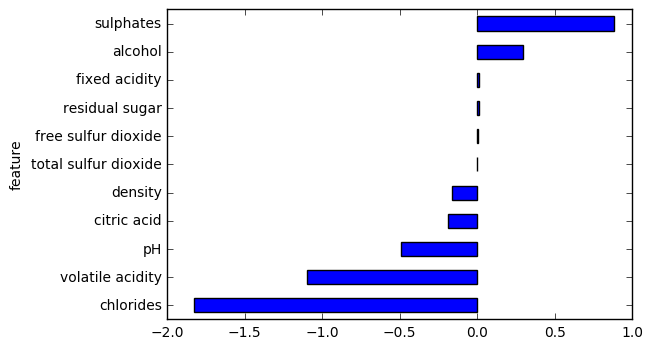

In [55]:
reg = linear_model.Ridge(alpha = 0.1)
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.coef_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)
scores = cross_val_score(reg, redwine[x_columns], redwine["quality"], cv=5, scoring="mean_squared_error")
print(i, -1 * scores.mean())

リッジ回帰によって、重回帰に正規化項を加えているので、複雑さを調整できるようになった。

## 高精度なモデルを構築する

### ランダムフォレスト

決定木を複数作ってその平均をとる。
決定木は、low bias,high valianceなので、大量に決定木を作ってその平均を取るのが良い。

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

reg = RandomForestRegressor()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6]
}
gs = GridSearchCV(reg,
                  params,
                  cv=5,
                  scoring="mean_squared_error",
                  n_jobs=1,
                  verbose=1)
gs.fit(redwine[x_columns], redwine["quality"])
print(-gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   23.0s finished


0.413017936754
{'max_depth': 6, 'n_estimators': 200}


リッジ回帰での平均二乗誤差が「0.435」だったので、ランダムフォレストの方が高精度になっている。 また、決定木と同様に変数の重要度を確認することができる。

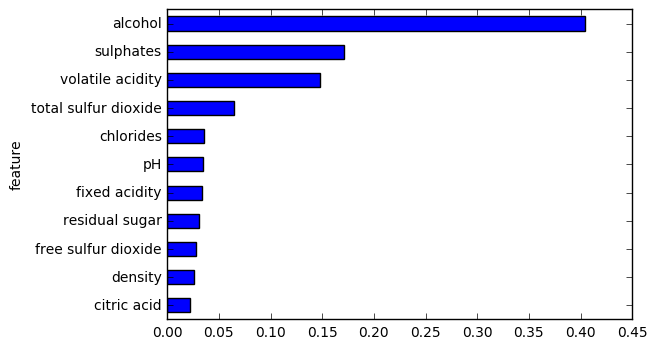

In [57]:
reg = gs.best_estimator_
reg.fit(redwine[x_columns], redwine["quality"])
feature_coef = pd.DataFrame([i for i in zip(x_columns, reg.feature_importances_)])
feature_coef.columns = ["feature", "coef"]
feature_coef.sort_values("coef", ascending=True).plot(kind="barh", x="feature", y="coef",legend=False)

### xgboostでモデリング

In [58]:
import pickle
import xgboost as xgb
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

x_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
             'pH', 'sulphates', 'alcohol']
params={'max_depth': [2, 3, 4, 5, 6],
        'subsample': [0.5],
        'colsample_bytree': [0.3, 0.5, 0.7],
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300],
}
reg = xgb.XGBRegressor()
gs = GridSearchCV(reg,
                  params,
                  cv=5,
                  scoring="mean_squared_error",
                  n_jobs=1,
                  verbose=1)
gs.fit(redwine[x_columns], redwine["quality"])
print(gs.best_params_)
print(- gs.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    9.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   50.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  2.2min


{'subsample': 0.5, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 3}
0.411201635995


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:  3.5min finished


モデルを組み合わせたり、与える変数に何か処理を加えたりすると良いかもしれない。

パラメータの探索を決め打ちするよりもランダムにしてみると...↓

In [59]:
param_distributions={'max_depth': sp.stats.randint(1,11),
                     'subsample': sp.stats.uniform(0.1,0.9),
                     'colsample_bytree': sp.stats.uniform(0.1,0.9),
                     'learning_rate': [0.1, 0.2, 0.3],
                     'n_estimators': [100, 200, 300],
}
reg = xgb.XGBRegressor()
rs = RandomizedSearchCV(reg,
                        param_distributions,
                        cv=5,
                        n_iter=1000,
                        scoring="mean_squared_error",
                        n_jobs=1,
                        verbose=1,
                        random_state=71)
rs.fit(redwine[x_columns], redwine["quality"])
print(- rs.best_score_)
print(rs.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   17.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  3.3min
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:  6.2min
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:  9.5min
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed: 13.9min
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed: 19.0min
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed: 24.6min
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed: 30.7min
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed: 38.1min


0.407736181543
{'subsample': 0.8810512667332148, 'colsample_bytree': 0.6589845305793237, 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 2}


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 38.1min finished
